In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import lime
import lime.lime_tabular
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')
from docx import Document
from docx.shared import Inches


In [3]:
fao_data = pd.read_csv("datasets/latest0205.csv", index_col='Unnamed: 0')
fao_data



,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Rodenticides – Other-3,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Bipiridils-3,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3
1990-01-01,0.0,0.0,0.0,Apples,26.3272,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Apricots,2.5781,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Cherries,5.0828,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Currants,7.0383,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Gooseberries,6.8081,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,0.0,0.0,0.0,Sunflower seed,-0.8656,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,-81.0,0.0,0.0,31.0,0.41,0.41,0.41
2020-01-01,-106607.0,-55584.0,26854.0,Hop cones,0.2323,-15.0,-241.0,142.0,140.0,-773.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.41,0.41
2020-01-01,0.0,0.0,0.0,Rape or colza seed,1.4064,0.0,0.0,0.0,0.0,0.0,...,0.0,-84.0,0.0,0.0,4.0,0.0,0.0,0.10,0.41,0.41
2020-01-01,0.0,0.0,0.0,Soya beans,-1.0056,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-84.0,0.0,0.0,4.0,0.0,0.10,0.10,0.41


In [4]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals',
       'Industrial_crops'], dtype=object)

Intercept 10.51232647801696
Prediction_local [19.97717439]
Right: 10.012190555955597


,Features_Fruits and Nuts,Coeffcients (RandomForest)_Fruits and Nuts
0,Yield(tonnes/ha)-1 <= 0.11,5.670790
1,Herbicides – Urea derivates <= 0.49,2.308696
2,Herbicides – Phenoxy hormone products <= 0.54,1.901634
3,Yield(tonnes/ha)-2 <= 0.11,-0.762558
4,Nutrient nitrogen N (total) - tonnes <= 0.54,0.668302
5,Nutrient potash K2O (total) - tonnes-3 <= 0.64,0.665963
6,Herbicides – Other <= 0.65,-0.561097
7,Herbicides – Carbamates <= 0.70,0.526922
8,Herbicides – Bipiridils-1 <= 0.55,-0.485870
9,Herbicides – Phenoxy hormone products-1 <= 0.54,-0.467934


Intercept 28.84313651130717
Prediction_local [87.22169126]
Right: 34.390357417007884


,Features_Vegetables and Legumes,Coeffcients (RandomForest)_Vegetables and Legumes
0,Yield(tonnes/ha)-1 > 0.16,54.483581
1,0.02 < Yield(tonnes/ha)-2 <= 0.09,12.717703
2,Herbicides – Phenoxy hormone products-1 <= 0.54,8.555167
3,Fung & Bact – Dithiocarbamates-2 <= 0.45,7.391149
4,Rodenticides – Other <= 0.58,-6.801608
5,Nutrient phosphate P2O5 (total) - tonnes-1 <= ...,-6.683024
6,Fung & Bact – Other-2 <= 0.43,-6.320621
7,Nutrient phosphate P2O5 (total) - tonnes <= 0.70,5.621962
8,Yield(tonnes/ha)-3 <= 0.02,-5.609458
9,Fung & Bact – Benzimidazoles-1 <= 0.70,-4.976297


Intercept 7.687218764453499
Prediction_local [8.15332821]
Right: 8.160579226728812


,Features_Cereals,Coeffcients (RandomForest)_Cereals
0,0.60 < Yield(tonnes/ha)-1 <= 0.67,1.371593
1,Herbicides – Other-1 <= 0.65,-0.611142
2,Herbicides – Urea derivates-1 <= 0.49,0.368527
3,0.60 < Yield(tonnes/ha)-2 <= 0.67,0.295634
4,Herbicides – Phenoxy hormone products-3 <= 0.54,-0.264196
5,Fung & Bact – Benzimidazoles-1 <= 0.70,-0.260676
6,Herbicides – Triazines <= 0.43,-0.255271
7,Insecticides – Other-1 <= 0.06,0.226501
8,Fung & Bact – Other-1 <= 0.43,-0.212927
9,Herbicides – Bipiridils-1 <= 0.55,-0.191934


Intercept 2.8189716695260225
Prediction_local [3.5541096]
Right: 6.090644632986638


,Features_Industrial_crops,Coeffcients (RandomForest)_Industrial_crops
0,Yield(tonnes/ha)-1 <= 0.35,0.544453
1,Herbicides – Phenoxy hormone products-2 <= 0.54,0.071280
2,Herbicides – Bipiridils-2 <= 0.55,0.060227
3,Herbicides – Bipiridils-1 <= 0.55,0.058675
4,Herbicides – Carbamates-2 <= 0.70,0.052457
5,Nutrient phosphate P2O5 (total) - tonnes-2 <= ...,-0.052097
6,Mineral Oils-1 <= 0.63,0.051040
7,Insecticides – Organo-phosphates-1 <= 0.70,-0.050801
8,Mineral Oils <= 0.63,-0.049632
9,"Fung & Bact – Triazoles, diazoles-1 <= 0.59",0.049536


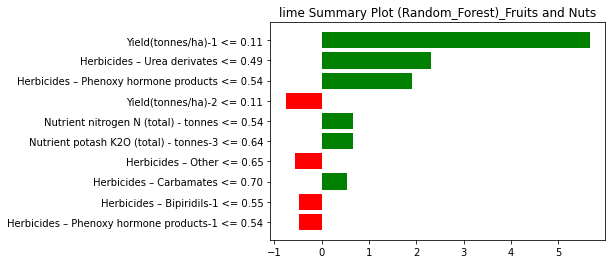

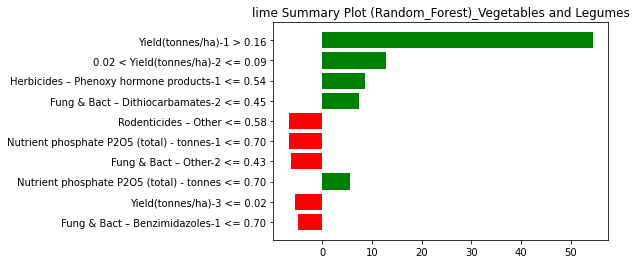

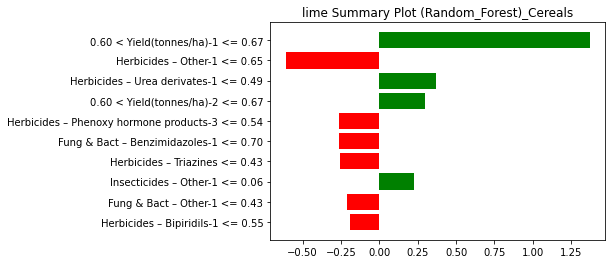

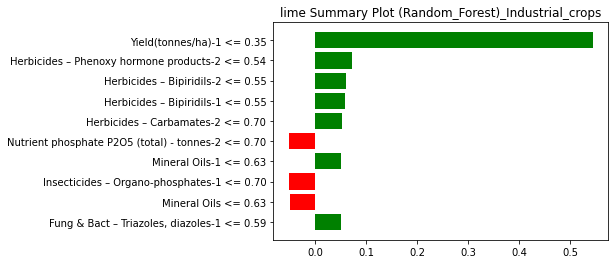

In [10]:
doc = Document()
mmsc_X = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    x = pd.DataFrame(mmsc_X.fit_transform(crop_df[x_vals]), columns=x_vals)
    y = crop_df['Yield(tonnes/ha)']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
    regressor = RandomForestRegressor(n_estimators = 500, random_state = 42, max_depth= 10)
    regressor.fit(x_train, y_train)
    #display(pd.DataFrame(x_train))
    #display(pd.DataFrame(y_test)['Yield(tonnes/ha)'])
   #  #prediction of new value
    y_pred = regressor.predict(x_test)

 


    #lime implementation
    explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=pd.DataFrame(x_test).columns, 
                    class_names=['Yield(tonnes/ha)'], verbose=True, mode='regression')
    exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[0], 
     regressor.predict, num_features=10)
    exp_list = exp.as_list()
    exp_list = [(feat, abs(coeff)) for feat, coeff in exp_list] # add absolute value of coefficients
    exp_list.sort(key=lambda x: x[1], reverse=True)
    exp.as_pyplot_figure()
    plt.title("lime Summary Plot (Random_Forest)_" + cat)
    display(pd.DataFrame(exp.as_list(),  columns=['Features_' + cat, 'Coeffcients (RandomForest)_' + cat]))

    
    # create a table for Lime results
    table = doc.add_table(rows=1, cols=2)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Features_' + cat
    hdr_cells[1].text = 'Coefficients (RandomForest)_' + cat
    
    for feature, coefficient in exp.as_list():
        row_cells = table.add_row().cells
        row_cells[0].text = str(feature)
        row_cells[1].text = str(coefficient)

    # add a page break
    doc.add_page_break()

# save the Word document
doc.save('lime_results_random_forest.docx')
   

    
   
